In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Chocolatina's album problem"

How many sheets on average should an agent buy to fill its album?

699
0


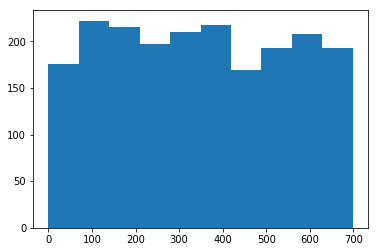

In [2]:
from random_generator import RandomGenerator

rg = RandomGenerator('uniform', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

699
0


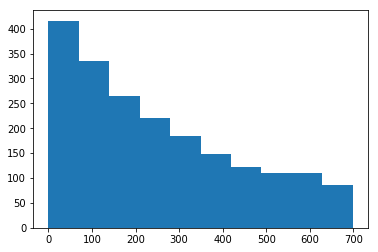

In [3]:
rg = RandomGenerator('exponential', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

8
0


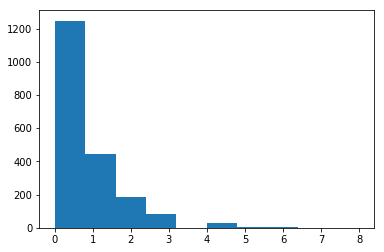

In [4]:
rg = RandomGenerator('custom')
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

## Data analysis

In [5]:
df = pd.read_csv("data/data.csv")
df.head()

,distribution,time,sheets,id,friends,surplus,purchased,agents,full_agents,stage
0,exponential,75,20,0,0,56,NaN,2,1,buy
1,exponential,169,20,1,2,150,NaN,2,2,buy
2,exponential,27,10,0,0,18,NaN,2,1,buy
3,exponential,113,10,1,2,104,NaN,2,2,buy
4,exponential,26,10,2,0,17,NaN,5,1,buy


In [6]:
exp = df[df['distribution'] == 'exponential']
uni = df[df['distribution'] == 'uniform']

In [7]:
exp.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,0.0,1109.000000,1109.000000
mean,1866.191163,274.634806,16.996393,32.701533,1709.751127,NaN,33.560866,17.504959
std,3253.701017,378.853935,13.542019,21.211378,3063.799780,NaN,16.036993,13.526456
min,9.000000,10.000000,0.000000,0.000000,4.000000,NaN,2.000000,1.000000
25%,163.000000,50.000000,5.000000,14.000000,148.000000,NaN,20.000000,6.000000
50%,681.000000,100.000000,14.000000,29.000000,599.000000,NaN,30.000000,15.000000
75%,1971.000000,400.000000,26.000000,52.000000,1772.000000,NaN,50.000000,26.000000
max,35025.000000,1400.000000,49.000000,76.000000,34258.000000,NaN,50.000000,50.000000


In [8]:
uni.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,462.000000,462.000000,462.000000,462.000000,462.000000,0.0,462.000000,462.000000
mean,950.606061,369.090909,15.779221,28.943723,741.619048,NaN,30.506494,16.112554
std,1174.618415,311.490080,13.333653,20.608558,1024.845262,NaN,16.163447,13.240488
min,18.000000,20.000000,0.000000,0.000000,7.000000,NaN,2.000000,1.000000
25%,136.250000,100.000000,5.000000,13.000000,85.250000,NaN,20.000000,5.000000
50%,483.000000,100.000000,12.000000,26.000000,384.000000,NaN,30.000000,13.000000
75%,1226.000000,700.000000,24.000000,44.000000,862.500000,NaN,50.000000,24.000000
max,5292.000000,700.000000,49.000000,76.000000,4616.000000,NaN,50.000000,50.000000


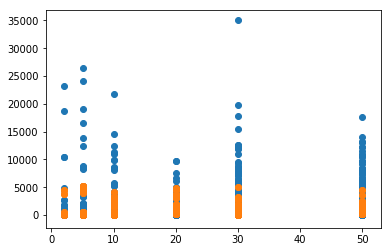

In [9]:
plt.scatter(exp['agents'], exp['time'])
plt.scatter(uni['agents'], uni['time'])

In [10]:
agents = df['agents'].unique()
print(len(agents))
distributions = df['distribution'].unique()
sheets = df['sheets'].unique()

6


In [11]:
agg = df[["time", "surplus", "agents", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets'])
final = agg.mean()
final

time       surplus
agents distribution sheets                            
2      exponential  10         70.000000     61.000000
                    20        122.000000    103.000000
                    50        507.000000    458.000000
                    100      1113.500000   1014.500000
                    200      2260.500000   2061.500000
                    400      4655.500000   4256.500000
                    700     10368.500000   9669.500000
                    1400    20958.500000  19559.500000
       uniform      20         52.000000     33.000000
                    100       428.000000    329.000000
                    700      4215.000000   3516.000000
5      exponential  10         81.000000     72.000000
                    20         91.400000     72.400000
                    50        526.600000    477.600000
                    100      1209.000000   1110.000000
                    200      2564.000000   2365.000000
                    400      4283.600000   3884.600000
                    700      9360.400000   8661.400000
                    1400    19992.000000  18593.000000
       uniform      20         69.000000     50.000000
                    100       492.000000    393.000000
                    700      4670.600000   3971.600000
10     exponential  10         77.700000     70.800000
                    20        124.375000    109.875000
                    50        422.000000    389.300000
                    100       666.777778    605.111111
                    200      1796.400000   1668.700000
                    400      2859.666667   2613.000000
                    700      5414.444444   4994.444444
                    1400    10937.444444  10097.555556
...                                  ...           ...
20     exponential  10         57.470588     51.000000
                    20        113.333333    101.000000
                    50        328.529412    300.470588
                    100       614.368421    559.052632
                    200      1150.210526   1039.684211
                    400      2059.894737   1842.421053
                    700      4474.947368   4090.842105
       uniform      100       237.222222    184.000000
                    700      2095.250000   1713.150000
30     exponential  10         83.600000     77.320000
                    20        124.862069    113.724138
                    50        414.448276    385.931034
                    100       691.703704    637.148148
                    200      1280.142857   1170.892857
                    400      2562.137931   2350.586207
                    700      4454.214286   4089.035714
                    1400     9481.178571   8745.964286
       uniform      20         36.833333     26.055556
                    100       208.136364    152.863636
                    700      1617.769231   1244.807692
50     exponential  10         74.375000     68.475000
                    20        120.697674    109.790698
                    50        394.021277    365.936170
                    100       714.162791    660.348837
                    200      1081.340909    975.136364
                    400      2644.531915   2434.170213
                    700      4385.021277   4024.255319
                    1400     7078.157895   6360.078947
       uniform      100       156.352941    103.117647
                    700      1279.688889    919.733333

[63 rows x 2 columns]

In [12]:
data = pd.read_csv('data/custom_distribution.csv')
data.loc[-1] = (-1, 0)
data = data.sort_values('sheet').reset_index()
data.drop('index', axis=1, inplace=True)
data['sheet'] = list(data.index)
data['distribution'] = data['distribution'].cumsum()

if (1 - data["distribution"].iloc[-1]) > 1e-10:
    raise Exception("The sum of probabilities must be 0")
random_args = [data]
print(data)

Exception: The sum of probabilities must be 0

In [ ]:
def __custom_random(data):
    n = np.random.uniform()
    low = 0
    top = len(data) - 1
    while top - low > 1:
        middle = low + (top - low) // 2
        if n > data.loc[middle]['distribution']:
            low = middle
        elif n < data.loc[middle]['distribution']:
            top = middle
    return data.loc[low + (top - low) // 2]["sheet"]

In [ ]:
rg = __custom_random

In [ ]:
rg(*random_args)

In [ ]:
a = [rg(*random_args) for i in range(200)]
plt.hist(a)
#print(a)

In [ ]:
test = [i/10 + 0.05  for i in range(10)]

In [ ]:
def __custom_random(data, test, pos):
    n = test[pos]
    low = 0
    top = len(data) - 1
    print(n)
    middle = low + (top - low) // 2
    while top - low > 1:
        middle = low + (top - low) // 2
        print(low, middle, top)
        if n > data.loc[middle]['distribution']:
            low = middle
        elif n < data.loc[middle]['distribution']:
            top = middle
        else:
            break
    return data.loc[low + (top - low) // 2]["sheet"]

In [ ]:
print(data)
__custom_random(data, test, 0)

In [ ]:
a = [__custom_random(data, test, i) for i in range(10)]
plt.hist(a)
print(a)